In [1]:
import json

cis_filter = False

if cis_filter:
  f = open('rankings_cis_actors.json', 'r')
else:
  f = open('rankings_actors.json', 'r')

original_data = json.load(f)
f.close()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [3]:
print(original_data)

[{'strat': 'Governments', 'mu': 3.9856940949179642, 'sigma': 0.7820039157470787}, {'strat': 'Researchers and companies', 'mu': 3.057903834351394, 'sigma': 0.7804346050168929}, {'strat': 'People', 'mu': 2.5651698346657708, 'sigma': 0.7823522713771596}]


In [4]:
import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [5]:
# created the basic data structure that will be plotted



data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  strat = str(i+1).zfill(2) + '. ' + d['strat']
  for j in range(n):
    data.append([strat, values[j]])
    
df = pd.DataFrame(data, columns=['Actor', 'Value'])
print(df)

                  Actor     Value
0       01. Governments  4.464218
1       01. Governments  4.214271
2       01. Governments  4.928580
3       01. Governments  5.499575
4       01. Governments  4.314431
5       01. Governments  4.005579
6       01. Governments  4.848278
7       01. Governments  4.530048
8       01. Governments  4.245756
9       01. Governments  5.286781
10      01. Governments  3.804217
11      01. Governments  5.120000
12      01. Governments  4.612841
13      01. Governments  3.605174
14      01. Governments  2.507207
15      01. Governments  2.330674
16      01. Governments  4.234687
17      01. Governments  4.056238
18      01. Governments  5.015218
19      01. Governments  2.628669
20      01. Governments  4.098843
21      01. Governments  3.350036
22      01. Governments  3.972239
23      01. Governments  2.513121
24      01. Governments  5.440860
25      01. Governments  4.200083
26      01. Governments  3.603416
27      01. Governments  4.756458
28      01. Go

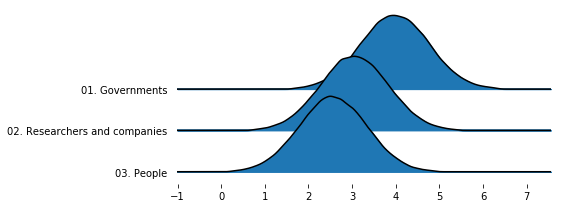

In [6]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Actor",figsize=(8,3))